In [1]:
# Data Read
import pandas as pd
from pandas import Series, DataFrame

# Data Analysis and Visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read Titanic data

train_data = pd.read_csv("train.csv", index_col = 0)
train_data.head() # See first 5 (by default) dataframes

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info() # Used to check for NaN objects

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
# Get some Stats
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:

    1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
    2.) What deck were the passengers on and how does that relate to their class?
    3.) Where did the passengers come from?
    4.) Who was alone and who was with family?
    
Then we'll dig deeper, with broader questions:

    5.) What factors helped someone survive the sinking? <- End target based on previous information
    6.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
    7.) Did having a family member increase the odds of surviving the crash?
    
Project Objective:
Determine the Factors (Age <Categorized into Child, Adult, Senior>, Gender, Family, Deck Position of Passenger, Passenger Class which may affect the Deck Position of Passenger) that affect the Survival of Passengers.



# Data Processing
- Categorize data on:
    - age to child, adult, senior categories
    - passenger companions to alone, family categories

In [5]:
# Age to Age Category - Child (age < 15 y.o), Adult (15 <= age < 65 y.o), Senior (age >= 65 y.o) Categories

# Add new column to input categories (write in same dataframe)
def age_categorization(passenger_age):
    # Compare the age, otherwise leave the sex
    #print(passenger_age, type(passenger_age))
    
    if passenger_age < 16:
        return 'Child'
    elif passenger_age >= 16 and passenger_age < 65:
        return 'Adult'
    elif passenger_age >= 65:
        return 'Senior'
    else:
        return 'Unknown'

train_data["Age Category"] = train_data['Age'].apply(age_categorization) 
train_data.head(n = 10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Unknown
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult


In [6]:
# Sibsp, Parch to Accompanied Categories (Yes and No)

def accomponied_categorization(passenger):
    age_category, sibsp, parch = passenger
    
    family_members = sibsp + parch
    
    if family_members > 0:
        return "True"
    elif family_members == 0:
        return "False"
    elif family_members == 0 and age_category == "Child": # Assuming the child is accompanied by a nanny, already included
        return "True"
    else:
        return "Unknown"

train_data["Accompanied"] = train_data[['Age Category', 'SibSp', 'Parch']].apply(accomponied_categorization, axis = 1) 
train_data.head(n = 10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category,Accompanied
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,True
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,False
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Unknown,False
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult,False
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,True
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult,True


In [7]:
# Passenger Class compared to Cabin position
train_cabin_data = train_data['Cabin'].dropna()
train_cabin_data.head(n = 10)

PassengerId
2             C85
4            C123
7             E46
11             G6
12           C103
22            D56
24             A6
28    C23 C25 C27
32            B78
53            D33
Name: Cabin, dtype: object

In [8]:
train_cabin_data.describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [9]:
train_cabin_data

PassengerId
2              C85
4             C123
7              E46
11              G6
12            C103
          ...     
872            D35
873    B51 B53 B55
880            C50
888            B42
890           C148
Name: Cabin, Length: 204, dtype: object

In [10]:
train_cabin_data.iloc[0]

'C85'

In [11]:
values = {'Cabin': '0'}

train_data.fillna(value = values, inplace = True)
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category,Accompanied
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Adult,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,True
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Adult,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Adult,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,Adult,False
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Adult,False
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,0,S,Unknown,True


In [12]:
# Cabin data to Deck Position Conversion

# NaN data type is float but cabin is string. Conflicting data types cause issue in processing. Need to convert all to string.
def cabinToDeckConversion(cabin):
    #print(cabin, cabin[0], type(cabin))
    
    if cabin[0] == '0':
        # print("No data present")
        return 'Unknown'
    else:
        # print(cabin[0])
        return cabin[0]

train_data['Deck'] = train_data['Cabin'].apply(cabinToDeckConversion) 
train_data.head(n = 10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category,Accompanied,Deck
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Adult,True,Unknown
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,True,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Adult,False,Unknown
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,True,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Adult,False,Unknown
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,0,Q,Unknown,False,Unknown
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult,False,E
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S,Child,True,Unknown
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S,Adult,True,Unknown


# Some Data Visualization

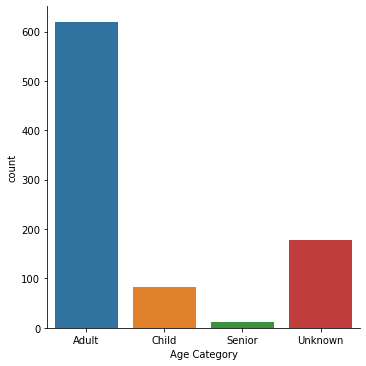

In [34]:
# Age Category
sns.catplot(x = "Age Category", data = train_data, kind = 'count', order = ['Adult', 'Child', 'Senior', 'Unknown'])

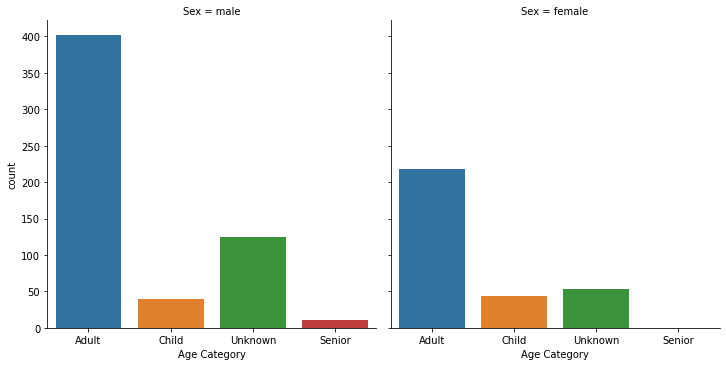

In [33]:
# Age Category, split by Gender
sns.catplot(x = "Age Category", col = "Sex", data = train_data, kind = 'count', order = ['Adult', 'Child', 'Senior', 'Unknown'])

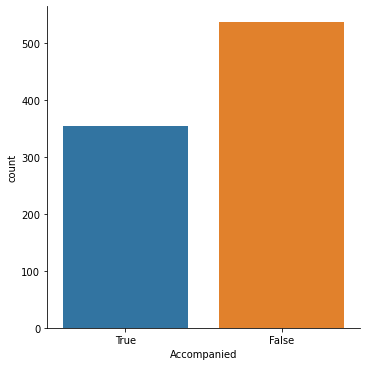

In [15]:
# Passenger with Relatives Onboard
sns.catplot(x = "Accompanied", data = train_data, kind = 'count')

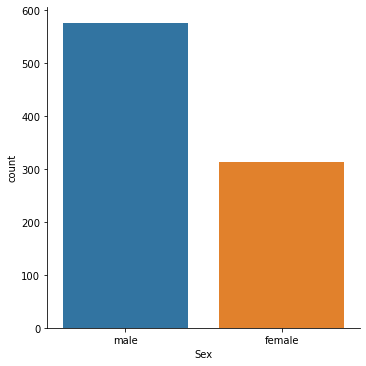

In [16]:
# Gender Comparison
sns.catplot(x = 'Sex', data = train_data, kind = 'count')

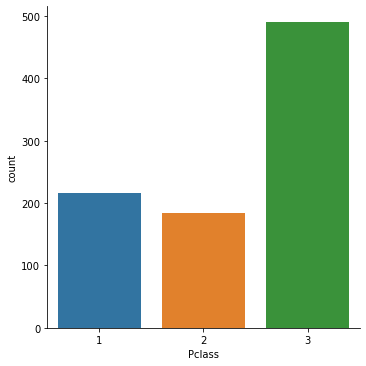

In [17]:
# Number of People at each Passenger Class
sns.catplot(x = 'Pclass', data = train_data, kind = 'count')

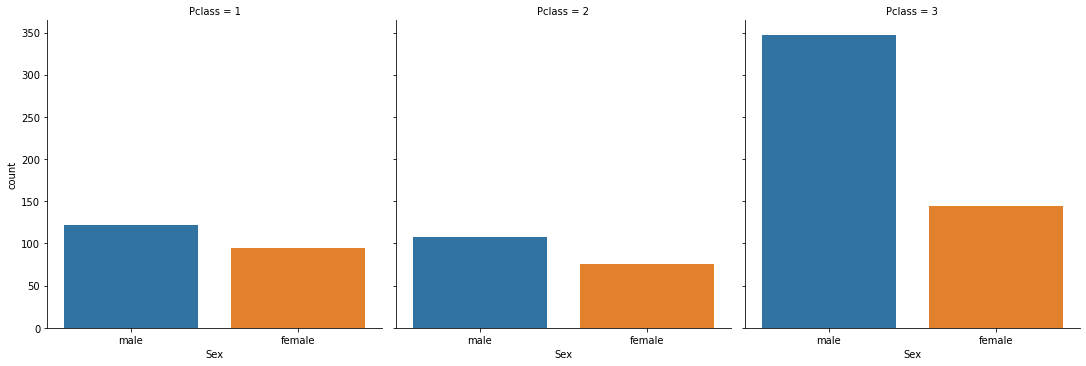

In [18]:
# Number of People at each Passenger Class
sns.catplot(x = 'Sex', col = 'Pclass', data = train_data, kind = 'count')

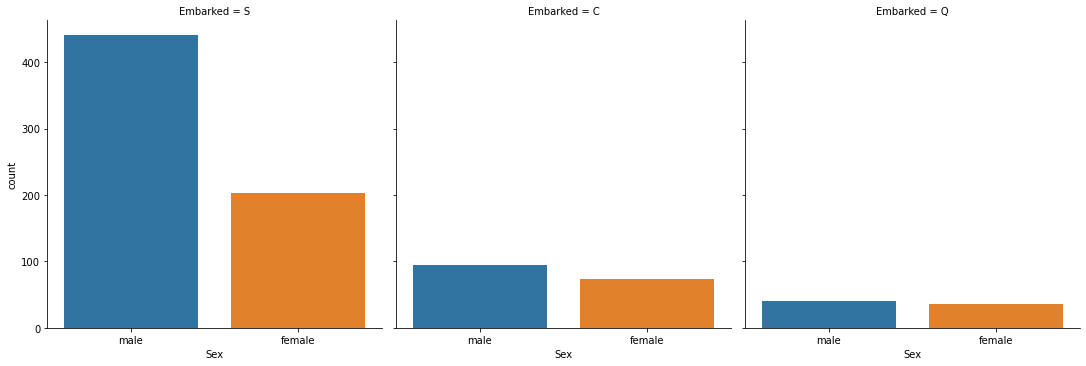

In [19]:
sns.catplot(x = 'Sex', col = 'Embarked', data = train_data, kind = 'count')

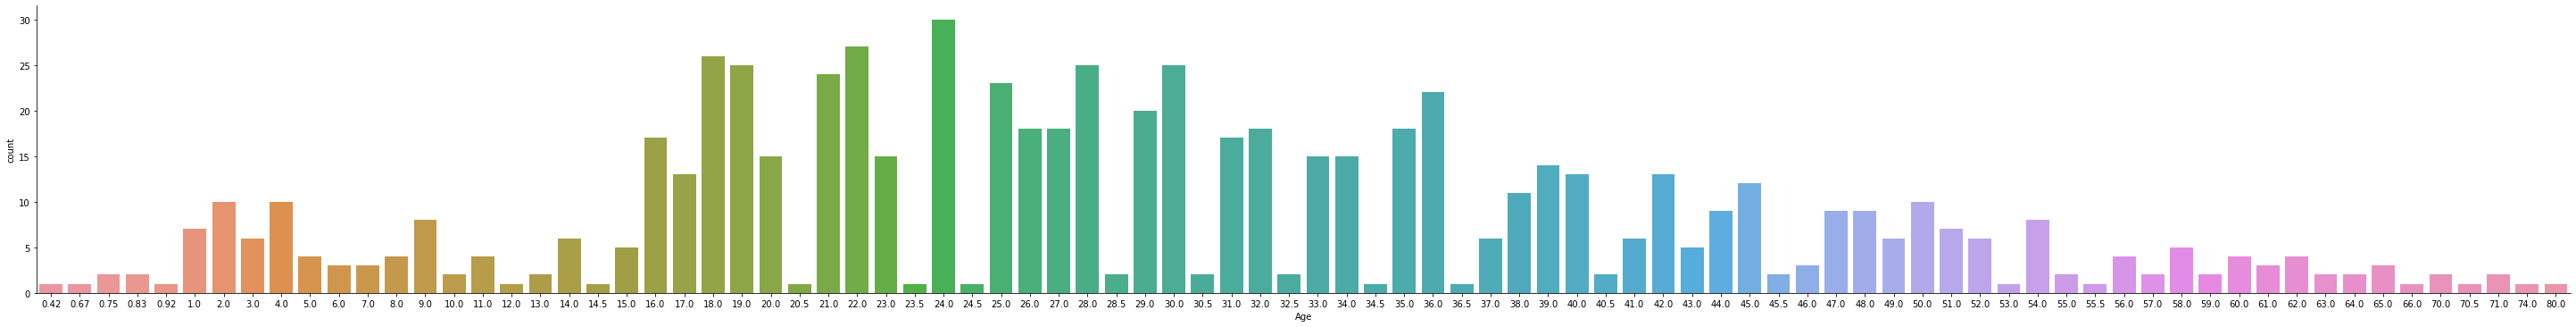

In [20]:
# Age Analysis
sns.catplot(x = 'Age', data = train_data, kind = 'count', aspect = 8) # How to apply bins to this?

<AxesSubplot:>

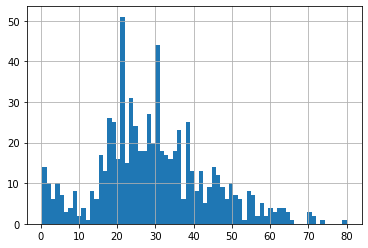

In [21]:
train_data['Age'].hist(bins=70)

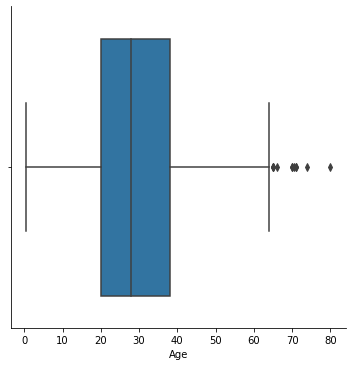

In [22]:
sns.catplot(x = 'Age', data = train_data, kind = 'box')

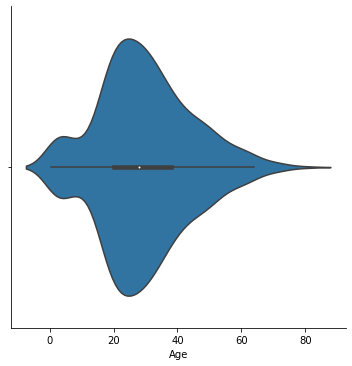

In [23]:
sns.catplot(x = 'Age', data = train_data, kind = 'violin')

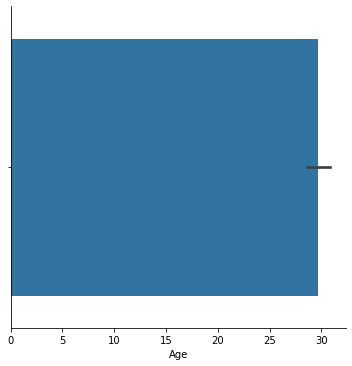

In [24]:
# Create histogram plot with bins 
sns.catplot(x = 'Age', data = train_data, kind = 'bar') # Need y axis - Age count data

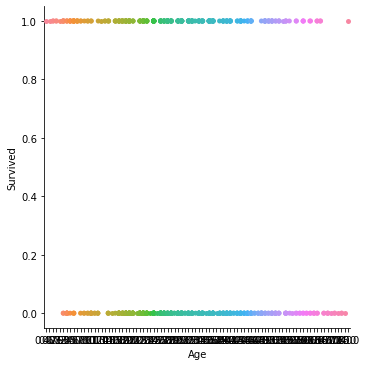

In [25]:
sns.catplot(x = 'Age', y = "Survived", data = train_data) # Indicates Age may not determine Survival Rate

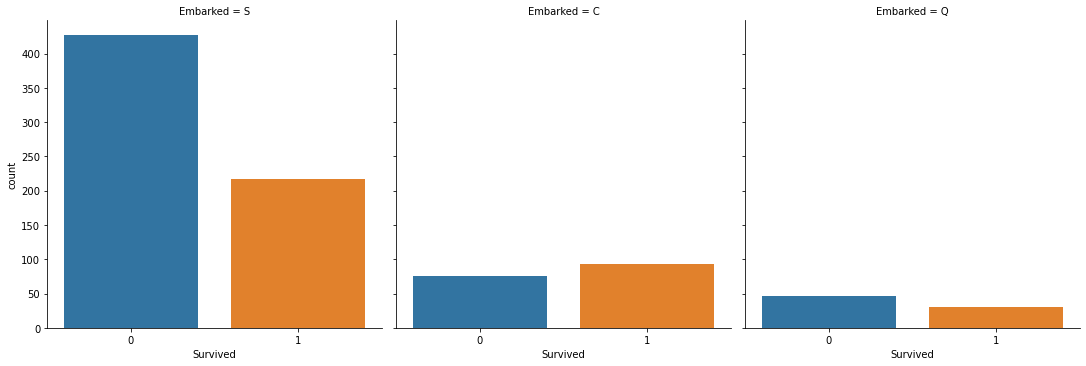

In [26]:
sns.catplot(x = 'Survived', col = 'Embarked', data = train_data, kind = 'count')

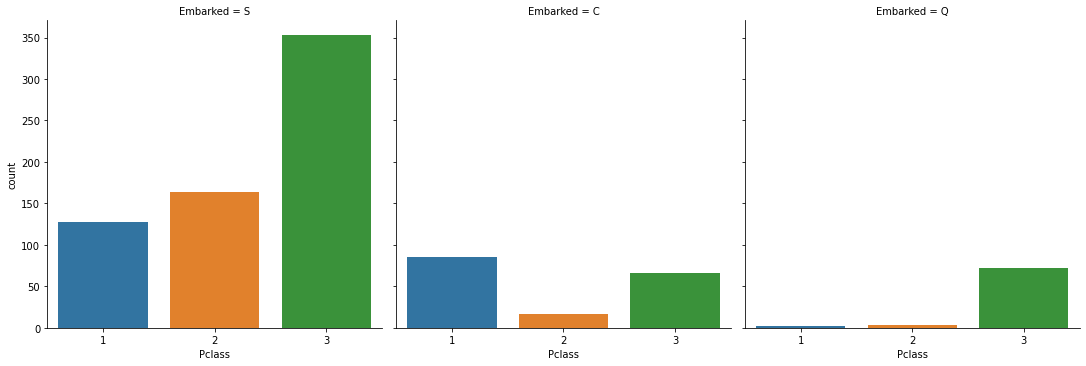

In [27]:
sns.catplot(x = 'Pclass', col = 'Embarked', data = train_data, kind = 'count')

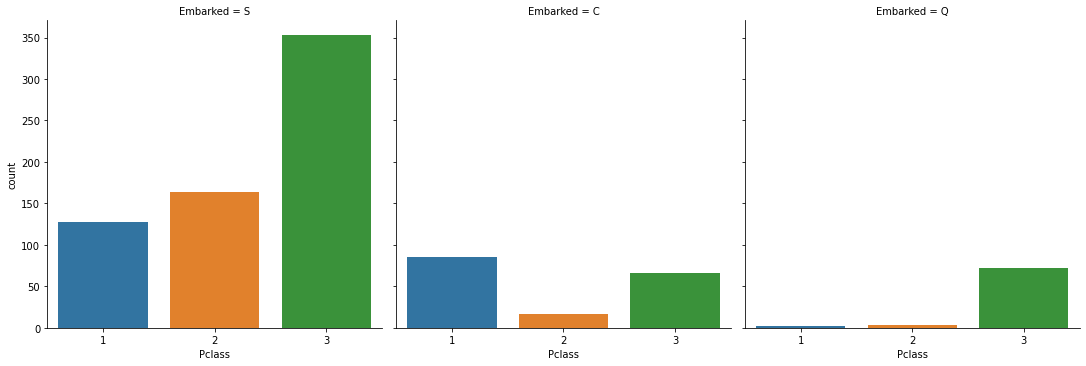

In [28]:
sns.catplot(x = 'Pclass', col = 'Embarked', data = train_data, kind = 'count')

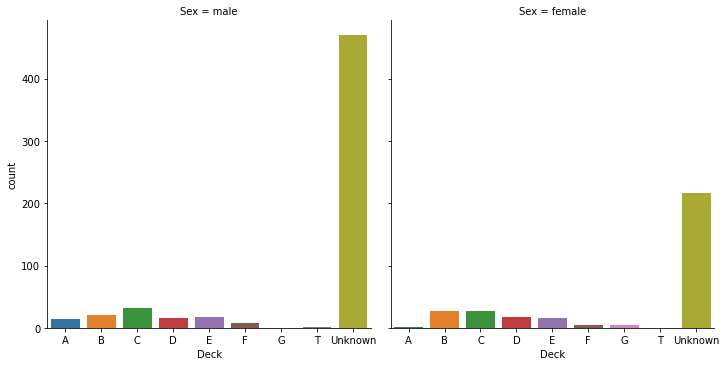

In [36]:
sns.catplot(x = 'Deck', col = 'Sex', data = train_data, kind = 'count', order = ['A', 'B', 'C', 'D', 'E', 'F',  'G', 'T', 'Unknown']) # try to rearrange to alphabetical order

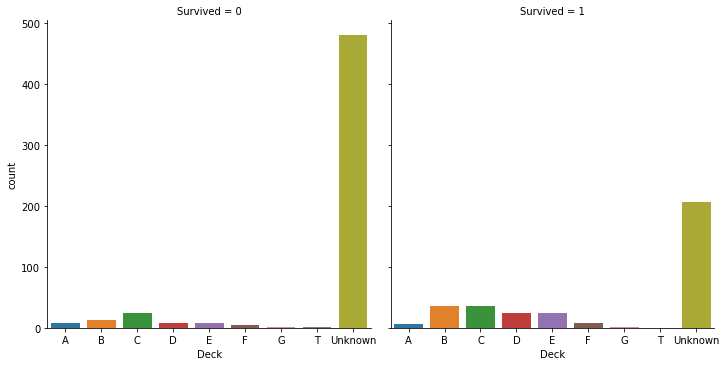

In [35]:
sns.catplot(x = 'Deck', col = 'Survived', data = train_data, kind = 'count', order = ['A', 'B', 'C', 'D', 'E', 'F',  'G', 'T', 'Unknown']) # try to rearrange to alphabetical order